**Access and use ECG Lead 2 Dataset PhysioNet**

# Global Section

In [1]:
import datetime
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#<<----------------------------------- GLOBAL Variables

# Resampled every signal to this rate for consistency
BASIC_SRATE = 128 #Hz
print('Basic sampling rate(Hz):',BASIC_SRATE)

# global base directory
global_dir = 'db_npy'
print('GLOBAL DIR ::',global_dir)

std_annotations = os.path.join(global_dir,'annotations.txt')
print('STD ANN FILE ::',std_annotations)

# ------ load standard labels ------------------------------------------
std_ant = np.loadtxt(std_annotations, dtype='str',delimiter="\t")

# Seperate out stand beat and non-beat annotations using 'annotations.txt'
beat_ants = []
non_beat_ants = []
print('\nStandard Labels::')
for a in std_ant:
    # a[0] =  # standard label (char)
    # a[1] =  # type of label
    # a[2]  = # description (str)
    print(a[0]+'\t'+a[1]+'\t'+a[2])
    if a[1]=='b': #<<--- is a beat-annotation
        beat_ants.append(a[0])
    else:
        non_beat_ants.append(a[0])

print('')
print('beat-annotation:',len(beat_ants))
print('non-beat-annotation:',len(non_beat_ants))
#-----------------------------------------------------------------------------


# data file identifiers 
g_BEAT = '_BEAT.npy'         #<<--- beat annotations
g_NBEAT = '_NBEAT.npy'       #<<--- non-beat annotations
g_SIG2 = '_SIG_II.npy'     #<<--- Signal Data (Removed manual gain)



Basic sampling rate(Hz): 128
GLOBAL DIR :: db_npy
STD ANN FILE :: db_npy\annotations.txt

Standard Labels::
N	b	Normal beat
L	b	Left bundle branch block beat
R	b	Right bundle branch block beat
B	b	Bundle branch block beat (unspecified)
A	b	Atrial premature beat
a	b	Aberrated atrial premature beat
J	b	Nodal (junctional) premature beat
S	b	Supraventricular premature or ectopic beat (atrial or nodal)
V	b	Premature ventricular contraction
r	b	R-on-T premature ventricular contraction
F	b	Fusion of ventricular and normal beat
e	b	Atrial escape beat
j	b	Nodal (junctional) escape beat
n	b	Supraventricular escape beat (atrial or nodal)
E	b	Ventricular escape beat
/	b	Paced beat
f	b	Fusion of paced and normal beat
Q	b	Unclassifiable 
?	b	Beat not classified during learning
[	n	Start of ventricular flutter/fibrillation
!	n	Ventricular flutter wave
]	n	End of ventricular flutter/fibrillation
x	n	Non-conducted P-wave (blocked APC)
(	n	Waveform onset
)	n	Waveform end
p	n	Peak of P-wave
t	n	Peak of T

# Select a database and list its records

In [2]:
# Select a database name from ['mitdb', 'svdb', 'incartdb']
iDatabase = 'mitdb'
idbPath = os.path.join(global_dir,iDatabase + '_npy' )
print('Database@',idbPath)

# Read 'RECORDS' file for list of available records
record_list = np.loadtxt(os.path.join(idbPath,'RECORDS'), dtype='str',delimiter="\n")
print('Total Records =',len(record_list))
print(record_list)

Database@ db_npy\mitdb_npy
Total Records = 48
['100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '121' '122' '123' '124' '200'
 '201' '202' '203' '205' '207' '208' '209' '210' '212' '213' '214' '215'
 '217' '219' '220' '221' '222' '223' '228' '230' '231' '232' '233' '234']


# Select a record within a database and read its data

In [3]:
# Select a Record name
iRecord = '208' # (from database mitdb as selected in above cell)

#<<---------------------------------------------
# Load Beat-Annotation (Labels)
#<<---------------------------------------------
beat_file = os.path.join(idbPath,iRecord + g_BEAT)
iBeat = np.load(beat_file)
print('beats:',iBeat.shape)
# seperate out R-peaks and Labels (note both are in string format)
iRpeaks = iBeat[:,0].astype('int') #<<-- convert sampling locations to integer
iLabels = iBeat[:,1]               #<<-- labels remain as string
# print some values....
print('R-Peak\t', iRpeaks[0:5])
print('Labels\t', iLabels[0:5])
print('')

#<<---------------------------------------------
# Load Non-Beat-Annotation
#<<---------------------------------------------
nbeat_file = os.path.join(idbPath,iRecord + g_NBEAT)
iNbeat = np.load(nbeat_file)
print('non-beats:',iNbeat.shape)
# seperate out R-peaks and non-beats (note both are in string format)
inRpeaks = iNbeat[:,0].astype('int') #<<-- convert sampling locations to integer
inLabels = iNbeat[:,1] #<<-- labels remain as string
# print some values....
print('nR-Peak\t', inRpeaks[0:5])
print('nLabels\t', inLabels[0:5])
print('')

#<<---------------------------------------------
# Load Signal Data
#<<---------------------------------------------
signal_file = os.path.join(idbPath,iRecord + g_SIG2)
iSignal = np.load(signal_file)
print('Signal Length =',iSignal.shape)
print('Signal Duration =',len(iSignal)/BASIC_SRATE, 'sec')

beats: (2955, 2)
R-Peak	 [ 16  74 172 248 303]
Labels	 ['F' 'V' 'N' 'F' 'V']

non-beats: (85, 2)
nR-Peak	 [   3 2305 2878 4633 7058]
nLabels	 ['+' '~' '~' '~' '~']

Signal Length = (231111,)
Signal Duration = 1805.5546875 sec


# Plot the signal data (fixed duration)

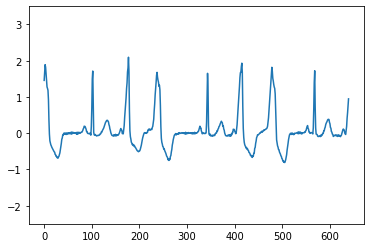

In [4]:
# select duration to be plotted
plot_from, plot_to = 10, 15 # in sec, plot 5 sec signal

# first convert to samples
pf, pt = int(plot_from*BASIC_SRATE), int(plot_to*BASIC_SRATE)
signal_slice = iSignal[pf:pt]

plt.ylim(-2.5,3.5)
_ = plt.plot(signal_slice)

# Plot the signal data (for any beat/R-peak)

Selected beat# 552 of 2955
R-Peak Location: 41001
Beat-Label: N


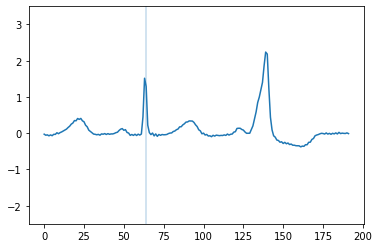

In [5]:
# find out total number of beats
nos_beats = len(iRpeaks)

# randomly select a beat to plot
random_beat_index = random.randint(0,nos_beats-1)
print('Selected beat#',random_beat_index,'of',nos_beats)

# find location of R-peak of that beat ( a single point )
Rpeak = iRpeaks[random_beat_index]
print('R-Peak Location:',Rpeak)

# select fixed duration of signal to be plotted on either side of the R-peak
left_duration = 0.5 # sec
right_duration = 1 # sec

# convert to duration in sec to samples
left_samples = int(left_duration*BASIC_SRATE)
right_samples = int(right_duration*BASIC_SRATE)

# calculate time interval
pf, pt = Rpeak-left_samples, Rpeak+right_samples # in samples
signal_slice = iSignal[pf:pt]

# plot
plt.figure('beat')
plt.ylim(-2.5,3.5)
plt.plot(signal_slice) #<<----- Plot signal slice
plt.vlines(Rpeak-pf,-2.5,3.5,linewidth=0.4) #<<----- Plot location of R-peak
print('Beat-Label:',iLabels[random_beat_index]) #<<----- Print Beat-Label

# Plot the signal data (fixed duration along with labels)

Heart-Rate: 96.0 bpm


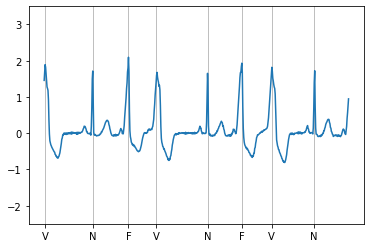

In [6]:
plot_from, plot_to = 10, 15 # in sec, plot 5 sec signal

# first convert to samples
pf, pt = int(plot_from*BASIC_SRATE), int(plot_to*BASIC_SRATE)
signal_slice = iSignal[pf:pt]

plt.plot(signal_slice)
plt.ylim(-2.5,3.5)


query_list = np.where((iRpeaks>=pf) & (iRpeaks<pt))[0]

rPeaks = iRpeaks[query_list] - pf
rLabels = iLabels[query_list]

_ = plt.xticks(rPeaks,rLabels)
plt.grid(axis='x')

# also calculate the Heart-Rate in beats per minute(BPM) for given duration
# if there are b beats in a in t sec duration then
# beats per second = b/t
# beats per minute = 60* (b/t)

b,t = len(rPeaks), plot_to-plot_from
bpm = 60*b/t
print('Heart-Rate:',round(bpm,2),'bpm')

# Counting labels present in a record

In [7]:
#-------------------------------------------------------------------------
# Find Count of Each Beat-Annotation in the record
print('Record:',iDatabase,iRecord)
beat_ant_count = {}
print('Total\t',len(iLabels))

bsum = 0
for b in beat_ants:
    beat_ant_count[b]= len(np.where(iLabels==b)[0])
    print(b,'\t',beat_ant_count[b])
    bsum+=beat_ant_count[b]
print('Sum\t',bsum)

Record: mitdb 208
Total	 2955
N 	 1586
L 	 0
R 	 0
B 	 0
A 	 0
a 	 0
J 	 0
S 	 2
V 	 992
r 	 0
F 	 373
e 	 0
j 	 0
n 	 0
E 	 0
/ 	 0
f 	 0
Q 	 2
? 	 0
Sum	 2955


# Find all beats of a particular lable in a given duration of the record

Total F type beats in given duration = 18

Randomly select one beat...
R-Peak Location: 12306
Beat-Label: F


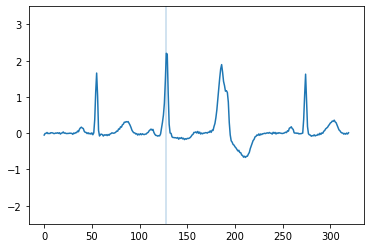

In [8]:
# Select the duration
time_from, time_to = 10, 100 # in sec

# Select type of label to find
lable_to_find='F'

# convert to samples
pf,pt = int(time_from*BASIC_SRATE), int(time_to*BASIC_SRATE)

# design query
a_query = (
          (iRpeaks >= pf) &
          (iRpeaks < pt) &
          (iLabels==lable_to_find)
          )

# retrive indices
a_list = np.where(a_query)[0]

print('Total',lable_to_find,'type beats in given duration =',len(a_list))


# plot a random beat from retrived list
print('\nRandomly select one beat...')
if len(a_list>0):
    sel_index = np.random.choice(a_list)
    
    
    # find location of R-peak of that beat ( a single point )
    Rpeak = iRpeaks[sel_index]
    print('R-Peak Location:',Rpeak)

    # select fixed duration of signal to be plotted on either side of the R-peak
    left_duration = 1 # sec
    right_duration = 1.5 # sec

    # convert to duration in sec to samples
    left_samples = int(left_duration*BASIC_SRATE)
    right_samples = int(right_duration*BASIC_SRATE)

    # calculate time interval
    pf, pt = Rpeak-left_samples, Rpeak+right_samples # in samples
    signal_slice = iSignal[pf:pt]

    plt.figure('beat')
    plt.ylim(-2.5,3.5)
    plt.plot(signal_slice) #<<----- Plot signal slice
    plt.vlines(Rpeak-pf,-2.5,3.5,linewidth=0.4) #<<----- Plot location of R-peak
    print('Beat-Label:',iLabels[sel_index]) #<<----- Print Beat-Label

# Creating a custom set of beat labels

In [9]:
# mapping standard labels to AAMI or custom labels : NOTE - only beat-annotations are mapped

# define a mapping dictionary
aami_ants = [ '_N','_S','_V','_F','_Q']
aami_mapping = {
    
    'N': '_N',
    'L': '_N',
    'R': '_N',
    'B': '_N',
    'A': '_S',
    'a': '_S',
    'J': '_S',
    'S': '_S',
    'V': '_V',
    'r': '_V',
    'F': '_F',
    'e': '_N',
    'j': '_N',
    'n': '_N',
    'E': '_N',
    'f': '_Q',
    '/': '_Q',
    'Q': '_Q',
    '?': '_Q',
                } # <<-- aami labels have been prefixed by _ to avoid confusion


# map all iLabels to aamiLabels
aamiLabels = np.zeros(len(iLabels), dtype='U2')  #<<--- U2 since we use 2 chars for aami labels

for i in range(0,len(iLabels)):
    aamiLabels[i]=aami_mapping[iLabels[i]]

#----- mapping done------------ 
# this new array can be used similar to iLabels

#-------------------------------------------------------------------------
# Find Count of Each AAMI Label in the record
print('Record:',iDatabase,iRecord)
aami_ant_count = {}
print('Total\t',len(aamiLabels))

bsum = 0
for b in aami_ants:
    aami_ant_count[b]= len(np.where(aamiLabels==b)[0])
    print(b,'\t',aami_ant_count[b])
    bsum+=aami_ant_count[b]
print('Sum\t',bsum)

Record: mitdb 208
Total	 2955
_N 	 1586
_S 	 2
_V 	 992
_F 	 373
_Q 	 2
Sum	 2955


# Find all beats of a particular aami or Custom lable in a given duration of the record

Total _N type beats in given duration = 96

Randomly select one beat...
R-Peak Location: 3034
Beat-Label: N
AAMI-Label: _N


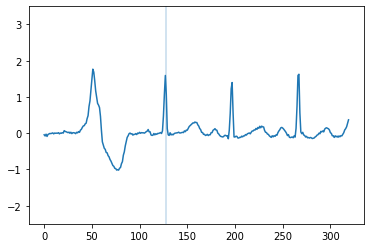

In [10]:
# Select a duration
time_from, time_to = 10, 100 # in sec
lable_to_find='_N'

# convert to samples
pf,pt = int(time_from*BASIC_SRATE), int(time_to*BASIC_SRATE)

# design query
a_query = (
          (iRpeaks >= pf) &
          (iRpeaks < pt) &
          (aamiLabels==lable_to_find)
          )

# retrive indices
a_list = np.where(a_query)[0]

print('Total',lable_to_find,'type beats in given duration =',len(a_list))


# plot a random beat from retrived list
print('\nRandomly select one beat...')
if len(a_list>0):
    sel_index = np.random.choice(a_list)
    
    
    # find location of R-peak of that beat ( a single point )
    Rpeak = iRpeaks[sel_index]
    print('R-Peak Location:',Rpeak)

    # select fixed duration of signal to be plotted on either side of the R-peak
    left_duration = 1 # sec
    right_duration = 1.5 # sec

    # convert to duration in sec to samples
    left_samples = int(left_duration*BASIC_SRATE)
    right_samples = int(right_duration*BASIC_SRATE)

    # calculate time interval
    pf, pt = Rpeak-left_samples, Rpeak+right_samples # in samples
    signal_slice = iSignal[pf:pt]

    plt.figure('beat')
    plt.ylim(-2.5,3.5)
    plt.plot(signal_slice) #<<----- Plot signal slice
    plt.vlines(Rpeak-pf,-2.5,3.5,linewidth=0.4)  #<<----- Plot location of R-peak
    print('Beat-Label:',iLabels[sel_index]) #<<----- Print Beat-Label
    print('AAMI-Label:',aamiLabels[sel_index]) #<<----- Print Beat-Label

# Displaying both standard and custom labels in a given duration

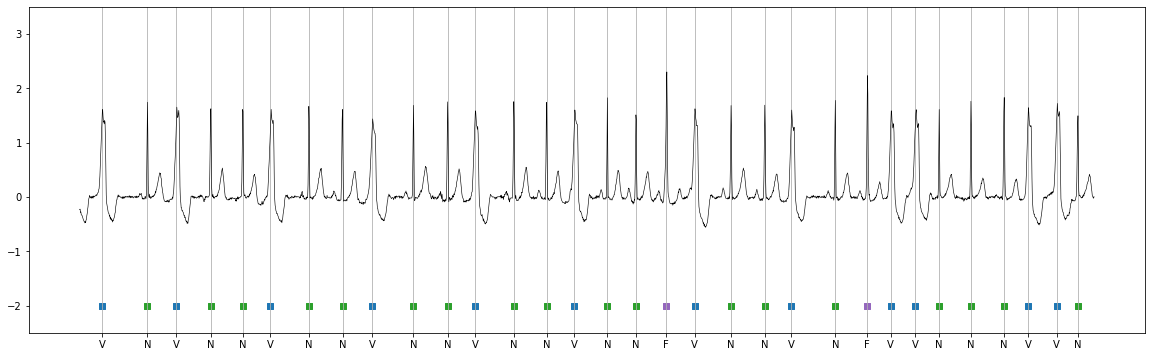

In [11]:
# Select time duration
plot_from, plot_to = 1000, 1020 # in sec, plot 20 sec signal

# first convert to samples
pf, pt = int(plot_from*BASIC_SRATE), int(plot_to*BASIC_SRATE)
signal_slice = iSignal[pf:pt]
plt.figure('fancy',figsize=(20,6))
plt.plot(signal_slice,linewidth=0.6,color='black')
plt.ylim(-2.5,3.5)

# display standard labels as ticks
query_list = np.where((iRpeaks>=pf) & (iRpeaks<pt))[0]

rPeaks = iRpeaks[query_list] - pf
rLabels = iLabels[query_list]

_ = plt.xticks(rPeaks,rLabels)
plt.grid(axis='x')

# display aami labels as scatter
rLabels = aamiLabels[query_list]

# need a color map for aami labels
aami_color_dict = {'_N':'tab:green','_S':'tab:red','_V':'tab:blue','_F':'tab:purple','_Q':'tab:gray'}
rLcol = np.zeros(len(rLabels), dtype='U10')
for i in range(0,len(rLabels)):
    rLcol[i]=aami_color_dict[rLabels[i]]
_ = plt.scatter(rPeaks,np.zeros(len(rPeaks))-2,color=rLcol,marker='s')


# plot RR-Intervals in a given duration
RR-Interval might be import to determine the regularity of the rhythm. It can also be used to calculate heart rate.

Heart-Rate: 96.7 bpm


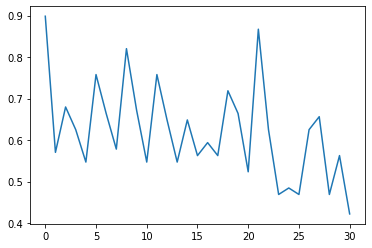

In [12]:
# Select time duration
plot_from, plot_to = 1000, 1020 # in sec, plot 20 sec signal

# first convert to samples
pf, pt = int(plot_from*BASIC_SRATE), int(plot_to*BASIC_SRATE)

query_list = np.where((iRpeaks>=pf) & (iRpeaks<pt))[0]
if len(query_list)>1 : #proceed only if at least 2 R peaks are present
    
    # calculate RR Intervals
    rpeaks_range = iRpeaks[query_list]
    rri_intervals = rpeaks_range[1:] - rpeaks_range[0:-1]
    
    # convert to seconds
    rri_intervals=rri_intervals/BASIC_SRATE
    
    # plot
    plt.plot(rri_intervals)
    
    # RR-Interval can also be considered as the duration of 1 beat
    # to calculate Hear-Rate, find average RR Interval
    avg_RRI = np.average(rri_intervals)
    
    # heart-rate
    bpm = 60/avg_RRI
    print('Heart-Rate:',round(bpm,2),'bpm')
    
else:
    print('Not enough R-Peaks in the interval')
        
        

